In [50]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import warnings
warnings.filterwarnings("ignore")

In [1]:
# DataSet Link : https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing

In [2]:
birds_file = '../input/audio-data/Parsed_Capuchinbird_Clips/XC114132-6.wav'
non_bird = '../input/audio-data/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-2.wav'

In [3]:
file_contents = tf.io.read_file(birds_file)

2022-09-19 18:42:56.258170: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
file_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF$A\n\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00\x80\xbb\x00\x00\x00\xee\x02\x00\x04\x00\x10\x00data\x00A\n\x00\xc3\xff\x95\x00b\xff\xe6\xffL\xff\x00\xffD\xff\xe5\xfeg\xffd\xff\xe0\xff\t\x00>\x00\xa9\x00I\x00\xb3\x00\x1f\x00\x07\x00\x95\xffe\xff\xfa\xfe\x0e\xff\x06\xff\xec\xfe\xa2\xff8\xff&\x00\x97\xff8\x00\x93\xff\xdb\xffn\xff~\xffN\xffh\xffN\xffM\xfft\xff[\xffb\xff\xfc\xffs\xfft\x00\xe3\xff,\x00\xc7\xff\xd1\xffW\xff\xa5\xff\x8f\xffc\xff\x07\x00\x85\xff\x87\x00\x1e\x00*\x01u\x003\x01\x9f\x00\xb2\x00\xc2\x00%\x00M\x00\x80\xff\xb3\xffp\xff\xc3\xff(\x00\x06\x00\xb9\x00\x1b\x00\x1d\x01U\x001\x01\x80\x00]\x00B\x00~\xff\xc0\xffK\xffc\xffR\xff\x8f\xff\xb4\xff\x10\x005\x00V\x00\x00\x000\x00\x81\xff\x9a\xffA\xff\xe8\xfe\x0f\xff\xa6\xfee\xff\xc8\xfep\x003\xff\x1e\x01\xff\xff\xf9\x00\x9f\x00Q\x00\xa3\x009\xffF\x00a\xfe\x8d\xff\xb2\xfe\xc6\xfe\xb2\xff\xc4\xfe\xa9\x00|\xff\x80\x01E\x00\x8e\x01\xc3\x00\xaa\x00\x94\x00\x0e\x00\xb4\xff\n\x00\x08\xff\xfe

In [5]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    

In [6]:
# output tensor is the amplitude of wave

wav

<tf.Tensor: shape=(168000, 1), dtype=float32, numpy=
array([[-0.00186157],
       [-0.00482178],
       [-0.00549316],
       ...,
       [ 0.00524902],
       [ 0.0017395 ],
       [-0.00039673]], dtype=float32)>

In [7]:
# Represent hertz of frequency 48000 or 4.8 KHz of frequency

sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=48000>

In [8]:
# To caluclate the time we simply need to divide the amplitide with 
168000/48000

3.5

In [9]:
wav = tf.squeeze(wav, axis=-1)

In [10]:
wav

<tf.Tensor: shape=(168000,), dtype=float32, numpy=
array([-0.00186157, -0.00482178, -0.00549316, ...,  0.00524902,
        0.0017395 , -0.00039673], dtype=float32)>

In [11]:
wav = tfio.audio.resample(wav, rate_in=48000, rate_out=16000)

2022-09-19 18:43:24.747513: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA
2022-09-19 18:43:25.007211: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [12]:
wav

<tf.Tensor: shape=(56000,), dtype=float32, numpy=
array([ 1.4380535e-08,  1.0882152e-08, -1.4184877e-07, ...,
       -1.1164588e-02, -1.4239633e-02, -8.1225550e-03], dtype=float32)>

### Function to load the files

In [13]:
# Source: Tensorflow Docs

def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

### Plot Wave of Birds and Non Birds

In [14]:
wave1 = load_wav_16k_mono(birds_file)
wave2 = load_wav_16k_mono(non_bird)

In [15]:
wave1

<tf.Tensor: shape=(56000,), dtype=float32, numpy=
array([ 1.4380535e-08,  1.0882152e-08, -1.4184877e-07, ...,
       -1.1164588e-02, -1.4239633e-02, -8.1225550e-03], dtype=float32)>

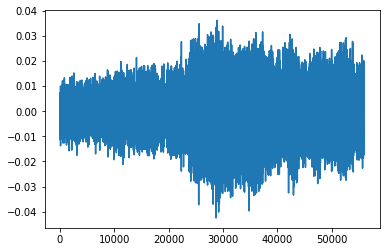

In [16]:
plt.plot(wave1)
plt.show()

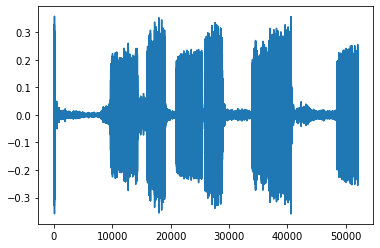

In [17]:
plt.plot(wave2)
plt.show()

## Now Create Tensorflow Dataset

In [18]:
postive = '../input/audio-data/Parsed_Capuchinbird_Clips'
negative = '../input/audio-data/Parsed_Not_Capuchinbird_Clips' 

In [19]:
pos_dataset = tf.data.Dataset.list_files(postive+'/*.wav')
neg_dataset = tf.data.Dataset.list_files(negative+'/*.wav')

In [20]:
len(pos_dataset)

217

### Add Labels with Sample path

1 is for Positive class nad 0 for negative class. We specify them with tf.zeros and tf.ones

In [21]:
positives = tf.data.Dataset.zip((pos_dataset, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos_dataset)))))
negatives = tf.data.Dataset.zip((neg_dataset, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_dataset)))))
data = positives.concatenate(negatives)

### Calculate Average Tensor length of each file of Bird

In [22]:
lengths = []
for file in os.listdir(postive):
    tensor_wave = load_wav_16k_mono(os.path.join(postive,file))
    lengths.append(len(tensor_wave))

In [23]:
tf.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [24]:
tf.reduce_mean(lengths)/16000

<tf.Tensor: shape=(), dtype=float64, numpy=3.38475>

As we know our function is converting audio into 16Hz the above value is the average audio time in seconds of birds

In [25]:
# For min and Max

print(tf.reduce_min(lengths)/16000)
print(tf.reduce_max(lengths)/16000)


tf.Tensor(2.0, shape=(), dtype=float64)
tf.Tensor(5.0, shape=(), dtype=float64)


# Convert Wav into Spectogram

In [26]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]

    # In case tensor is less then 48000 we simply pad zeros
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

### Test Spectogram

In [27]:
pos_path, pos_label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [28]:
spectrogram_pos, pos_label = preprocess(pos_path, pos_label)

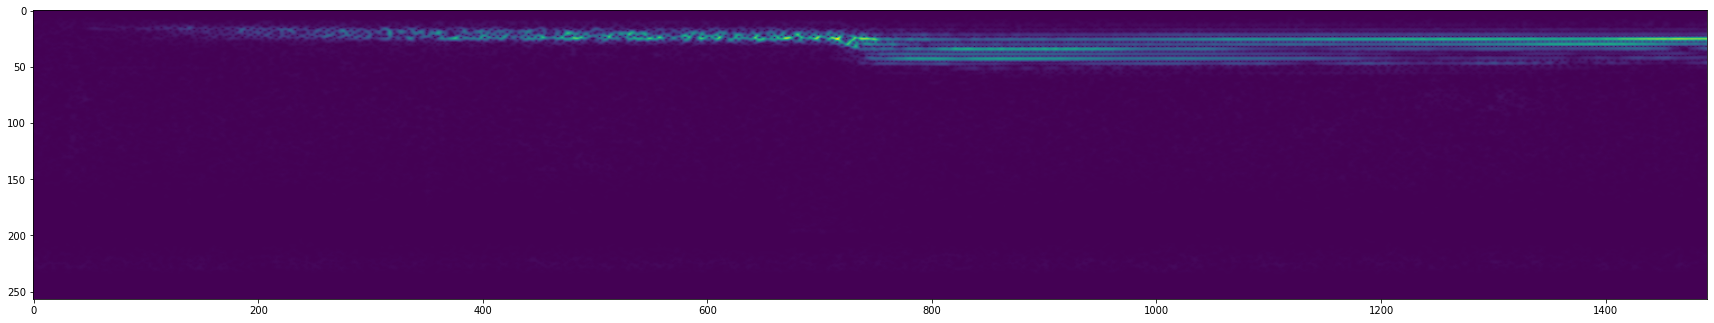

In [29]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram_pos)[0])
plt.show()

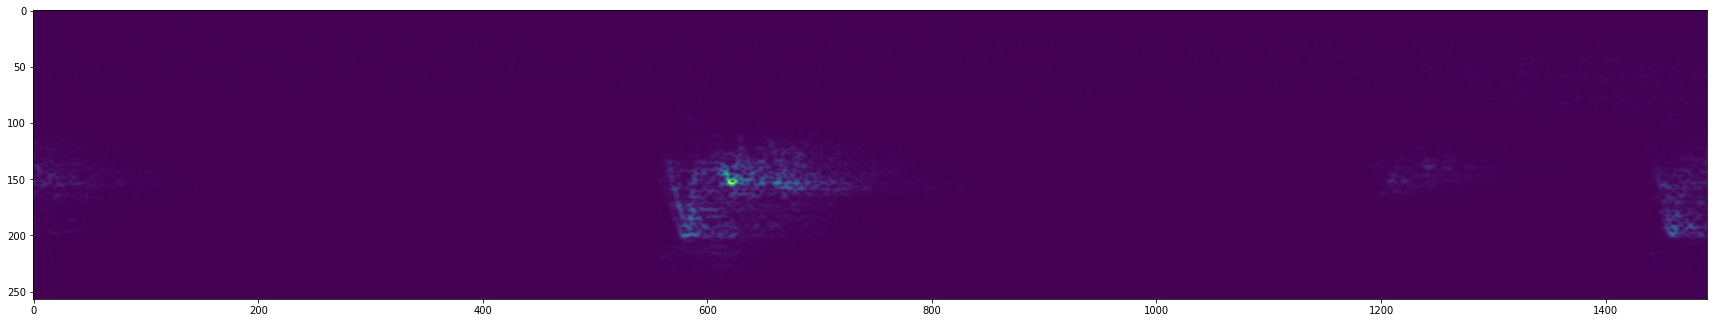

In [30]:
# For Negative

neg_path, neg_label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram_neg, neg_label = preprocess(neg_path, neg_label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram_neg)[0])
plt.show()

# Split Data into Train and Test set

In [31]:
data.as_numpy_iterator().next()

(b'../input/audio-data/Parsed_Capuchinbird_Clips/XC520626-0.wav', 1.0)

In [32]:
#Pipline for model

data = data.map(preprocess)
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [33]:
train = data.take(36)
test = data.skip(36).take(15)

In [34]:
samples, labels = train.as_numpy_iterator().next()

2022-09-19 18:47:05.389382: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 294 of 1000
2022-09-19 18:47:15.300449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 603 of 1000
2022-09-19 18:47:21.314821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


In [35]:
samples.shape,labels

((16, 1491, 257, 1),
 array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       dtype=float32))

# Build Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,Input, MaxPool2D

In [44]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu',strides=2, input_shape=(1491, 257,1)))
model.add(Conv2D(128, (3,3), activation='relu',strides=2))
model.add(Conv2D(256, (3,3), activation='relu',strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 745, 128, 64)      640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 372, 63, 128)      73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 185, 31, 256)      295168    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1468160)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               187924608 
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 188,294,401
Trainable params: 188,294,401
Non-trainable params: 0
________________________________________

In [52]:
hist = model.fit(train, epochs=5, validation_data=test)

Epoch 1/5


2022-09-19 19:07:19.102551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 370 of 1000
2022-09-19 19:07:29.068337: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 744 of 1000
2022-09-19 19:07:30.779193: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - ETA: 0s - loss: 0.0695 - accuracy: 0.9844

2022-09-19 19:11:25.978859: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 364 of 1000
2022-09-19 19:11:36.019402: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 742 of 1000
2022-09-19 19:11:37.814084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - 284s 7s/step - loss: 0.0695 - accuracy: 0.9844 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 2/5


2022-09-19 19:12:03.119918: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 363 of 1000
2022-09-19 19:12:13.149603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 740 of 1000
2022-09-19 19:12:15.026708: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.9948

2022-09-19 19:16:06.978233: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 374 of 1000
2022-09-19 19:16:16.970653: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 737 of 1000
2022-09-19 19:16:18.878424: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - 281s 7s/step - loss: 0.0478 - accuracy: 0.9948 - val_loss: 2.5125e-04 - val_accuracy: 1.0000
Epoch 3/5


2022-09-19 19:16:44.139194: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 362 of 1000
2022-09-19 19:16:54.151732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 736 of 1000
2022-09-19 19:16:56.077665: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - ETA: 0s - loss: 0.0729 - accuracy: 0.9896

2022-09-19 19:20:52.204226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 375 of 1000
2022-09-19 19:21:02.180818: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 736 of 1000
2022-09-19 19:21:04.149802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - 285s 7s/step - loss: 0.0729 - accuracy: 0.9896 - val_loss: 5.9525e-05 - val_accuracy: 1.0000
Epoch 4/5


2022-09-19 19:21:29.424281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 363 of 1000
2022-09-19 19:21:39.439143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 739 of 1000
2022-09-19 19:21:41.282777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9948

2022-09-19 19:25:35.521066: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 377 of 1000
2022-09-19 19:25:45.549175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 740 of 1000
2022-09-19 19:25:47.434087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - 283s 7s/step - loss: 0.0128 - accuracy: 0.9948 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 5/5


2022-09-19 19:26:12.746785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 374 of 1000
2022-09-19 19:26:22.745200: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 736 of 1000
2022-09-19 19:26:24.661190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9948

2022-09-19 19:30:22.122948: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 377 of 1000
2022-09-19 19:30:32.107458: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 740 of 1000
2022-09-19 19:30:34.025244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - 287s 7s/step - loss: 0.0584 - accuracy: 0.9948 - val_loss: 1.5080e-04 - val_accuracy: 1.0000


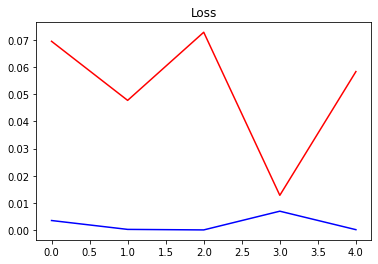

In [53]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

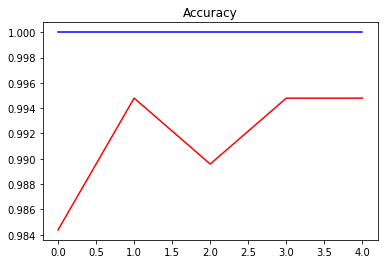

In [54]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.show()